In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
def rescale_city(df):
    if df['city'] == '서울':
        return df['people'] / 1.854383932
    elif df['city'] == '부산':
        return df['people'] / 0.645809193
    elif df['city'] == '대구':
        return df['people'] / 0.467168791
    elif df['city'] == '인천':
        return df['people'] / 0.569911163
    elif df['city'] == '광주':
        return df['people'] / 0.287369641
    elif df['city'] == '대전':
        return df['people'] / 0.289687138
    elif df['city'] == '울산':
        return df['people'] / 0.220162225
    elif df['city'] == '경기':
        return df['people'] / 2.588837389
    elif df['city'] == '강원':
        return df['people'] / 0.292584009
    elif df['city'] == '충북':
        return df['people'] / 0.315179606
    elif df['city'] == '충남':
        return df['people'] / 0.425646968
    elif df['city'] == '전북':
        return df['people'] / 0.346079567
    elif df['city'] == '전남':
        return df['people'] / 0.340672074
    elif df['city'] == '경북':
        return df['people'] / 0.512746234
    elif df['city'] == '경남':
        return df['people'] / 0.646967941
    elif df['city'] == '제주':
        return df['people'] / 0.129393588
    else:
        return None

In [3]:
dis = pd.read_csv('disease.csv')
dis = dis[['시도', '일자', '인원수']]
dis.rename(columns = {'시도' : 'city', '일자':'date', '인원수':'people'}, inplace = True)
dis['people'] = dis.apply(rescale_city, axis = 1)
dis['date'] = pd.to_datetime(dis['date'], format="%Y%m%d")

dis.head(n=10)

,city,date,people
0,강원,2014-01-01,10.253465
1,강원,2014-01-02,82.027723
2,강원,2014-01-03,71.774257
3,강원,2014-01-04,47.849505
4,강원,2014-01-05,13.671287
5,강원,2014-01-06,61.520792
6,강원,2014-01-07,78.609901
7,강원,2014-01-08,51.267327
8,강원,2014-01-09,51.267327
9,강원,2014-01-10,34.178218


In [4]:
print(dis['city'].unique())

['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '세종' '울산' '인천' '전남' '전북'
 '제주' '충남' '충북']


In [5]:
def graph(sido_list, year, df):
    start_date = str(year-1) + '-12-31'
    end_date = str(year+1) + '-01-01'
    mask = (df['date'] > start_date) & (df['date'] <= end_date)
    filtered_df = df.loc[mask].copy()
    filtered_df['month']=filtered_df['date'].dt.month
    group = filtered_df.groupby(['city','month'], as_index=False).mean()
#     group.rename(columns = {'people' :  }, inplace = True)
    
    ax = plt.gca()
    
    for item in sido_list:
        filt = (group['city'] == item)
        filted = group.loc[filt].copy()
        filted.rename(columns = {'people' : item}, inplace =True)
        filted.plot(x='month', y=item, ax=ax, figsize = (15,6))
        
    plt.ylabel('poeple')
    plt.xticks(range(1,13))
    plt.title(year)
    plt.legend(loc=(1.01, 0.0))
    plt.show()

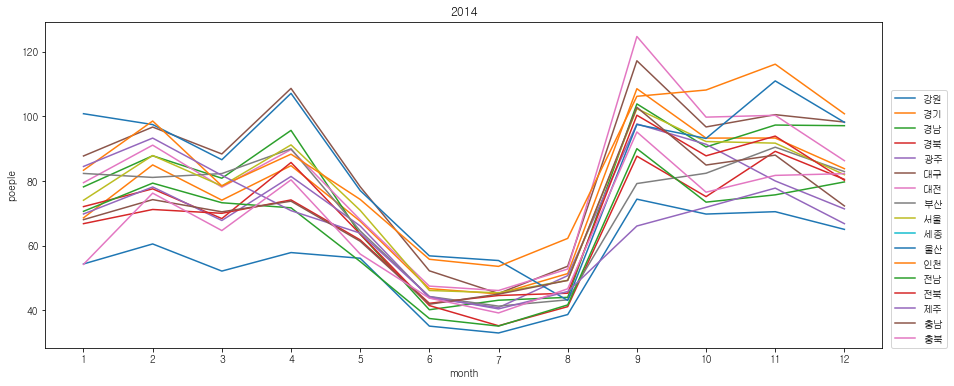

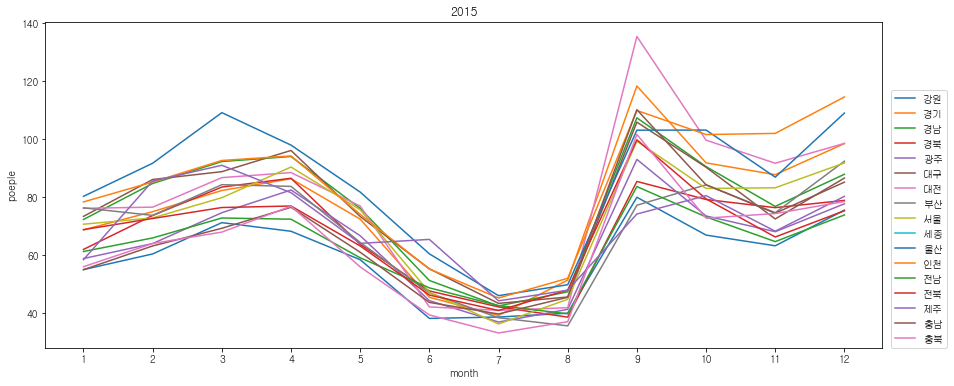

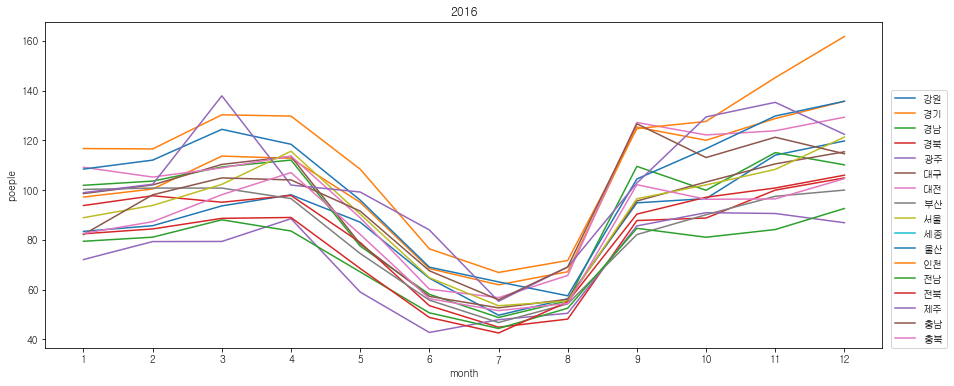

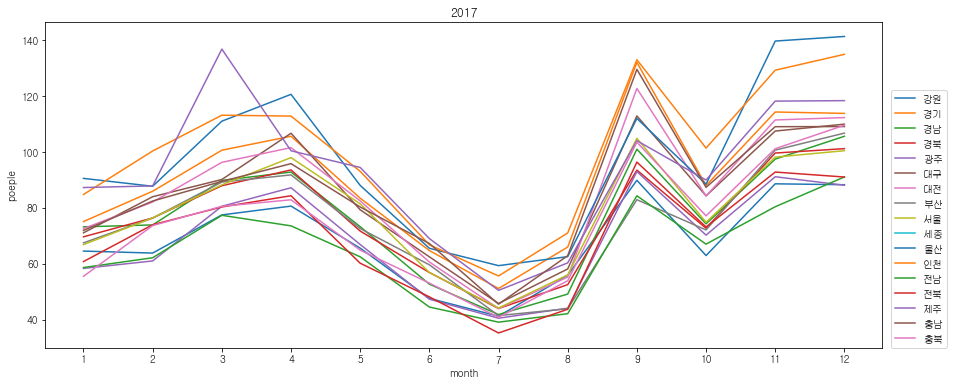

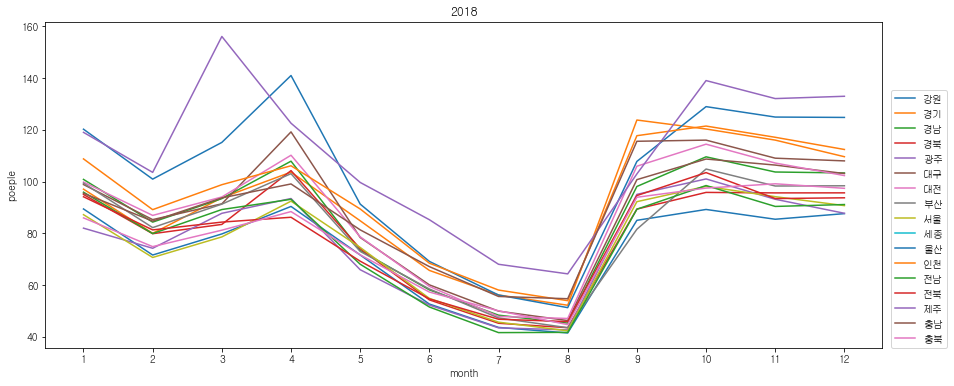

In [6]:
sido_list = ['강원', '경기', '경남', '경북', '광주' ,'대구', '대전', '부산', '서울' ,'세종' ,'울산' ,'인천' ,'전남', '전북',
 '제주', '충남' ,'충북']

year_list = [2014,2015,2016, 2017, 2018]

for year in year_list:
    graph(sido_list, year, dis)